# HF🤗 Deep Reinforcement Learning Course - Unit 1

## 1.- Dependencies

```python
!apt install python-opengl
!apt install ffmpeg
!apt install xvfb

!pip install pyvirtualdisplay
!pip install gym[box2d]
!pip install stable-baselines3[extra]
!pip install huggingface_sb3
!pip install pyglet
!pip install ale-py==0.7.4


```

## 2.- Import packages

In [1]:
import gym

from huggingface_sb3 import load_from_hub, package_to_hub, push_to_hub
from huggingface_hub import notebook_login

from stable_baselines3 import PPO
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.env_util import make_vec_env

## 3.- Gym and how it works

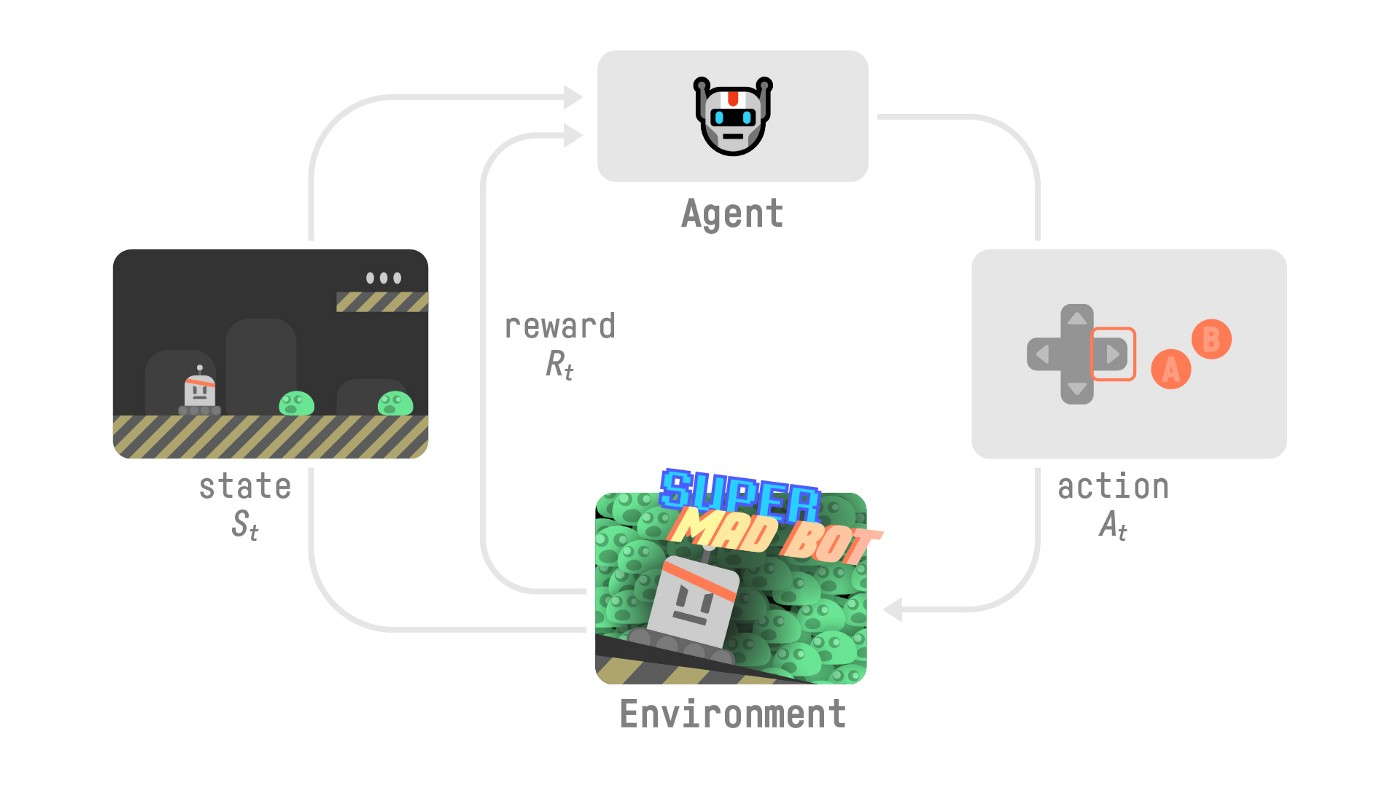

In [2]:
import gym

env = gym.make("LunarLander-v2")

observation = env.reset()

for _ in range(20):
    action = env.action_space.sample()
    print("Action taken: ", action)
    
    observation, reward, done, info = env.step(action)
    
    if done:
        print("Environment is reset")
        observation = env.reset()

Action taken:  1
Action taken:  2
Action taken:  2
Action taken:  2
Action taken:  3
Action taken:  2
Action taken:  0
Action taken:  0
Action taken:  0
Action taken:  0
Action taken:  0
Action taken:  1
Action taken:  1
Action taken:  0
Action taken:  1
Action taken:  1
Action taken:  1
Action taken:  2
Action taken:  3
Action taken:  0


## 4.- LunarLander environment 🌚

In [3]:
env = gym.make("LunarLander-v2")
env.reset()
print("____OBSERVATION SPACE____")
print("Observation Space Shape", env.observation_space.shape)
print("Sample observation", env.observation_space.sample())

____OBSERVATION SPACE____
Observation Space Shape (8,)
Sample observation [ 0.15754947 -0.2553348  -0.04788863 -0.43834376  1.290343   -0.41017264
  2.3103712   0.11764946]


The observation space represents the following information:
- Horizontal pad coordinate (x)
- Vertical pad coordinate (y)
- Horizontal speed (x)
- Vertical speed (y)
- Angle
- Angular speed
- If the left leg has contact point touched the land
- If the right leg has contact point touched the land

In [4]:
print("\n _____ACTION SPACE_____ \n")
print("Action Space Shape", env.action_space.n)
print("Action Space Sample", env.action_space.sample())


 _____ACTION SPACE_____ 

Action Space Shape 4
Action Space Sample 3


The action space represents the following information:
- Do nothing
- Fire left orientation engine
- Fire the main engine
- Fire right orientation engine

The reward function:
- Moving from the top of the screen to the landing pad and zero speed is about 100-140 points
- Firing main engine is -0.3 each frame
- Each leg ground contact is +10 points
- Episode finishes if the lander crashes (additional -100 points) or come to rest (+100 points)
- The game is solved if your agent does 200 points

In addition, in order to have more experiences during the training, we can create an stack of environments (vectorized environment).

In [5]:
env = make_vec_env("LunarLander-v2", n_envs=16)

## 5.- Making the model 🚀🤖

The first model that we're going to use is the [PPO](https://stable-baselines3.readthedocs.io/en/master/modules/ppo.html#example%5D).

In [6]:
model = PPO(
    policy="MlpPolicy",
    env=env,
    n_steps=1024,
    batch_size=64,
    n_epochs=4,
    gamma=0.999,
    gae_lambda=0.98,
    ent_coef=0.1,
    verbose=1
)

Using cuda device


## 6.- Training the agent

In [7]:
model.learn(total_timesteps=500000)

model_name = "ppo-LunarLander-v2"
model.save(model_name)

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 94.8     |
|    ep_rew_mean     | -207     |
| time/              |          |
|    fps             | 8516     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 16384    |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 89           |
|    ep_rew_mean          | -137         |
| time/                   |              |
|    fps                  | 5158         |
|    iterations           | 2            |
|    time_elapsed         | 6            |
|    total_timesteps      | 32768        |
| train/                  |              |
|    approx_kl            | 0.0054239994 |
|    clip_fraction        | 0.0477       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.38        |
|    explained_variance   | 0.000438     |
|    learning_r

## 7.- Evaluate the agent

In [8]:
eval_env = gym.make("LunarLander-v2")
mean_reward, std_reward = evaluate_policy(model, eval_env, n_eval_episodes=10, deterministic=True)
print(f"mean_reward={mean_reward:.2f} +/- {std_reward}")

/home/ehcalabres/miniconda3/envs/hf-deep-rl/lib/python3.8/site-packages/stable_baselines3/common/evaluation.py:65: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


mean_reward=-134.68 +/- 42.392648034538446
